 ### Exploratory Data Analysis (EDA) Project: World Happiness Report Dataset 

The World Happiness Report is an important report that sheds light on the social wellbeing of people across the globe. Through exploratory data analysis (EDA) on the World Happiness Report dataset, we can uncover insights and patterns related to global happiness and this can help us understand the factors that influence happiness across the world. 

#### Loading the libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

#### Loading the data

In [3]:
world_df = pd.read_csv("WHR2024.csv")
world_df.head()

,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


#### Data Understanding

In [4]:
display(world_df.shape)
display(world_df.info())

(143, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                143 non-null    object 
 1   Ladder score                                143 non-null    float64
 2   upperwhisker                                143 non-null    float64
 3   lowerwhisker                                143 non-null    float64
 4   Explained by: Log GDP per capita            140 non-null    float64
 5   Explained by: Social support                140 non-null    float64
 6   Explained by: Healthy life expectancy       140 non-null    float64
 7   Explained by: Freedom to make life choices  140 non-null    float64
 8   Explained by: Generosity                    140 non-null    float64
 9   Explained by: Perceptions of corruption     140 non-null    float64
 10  Dystopia + res

None

The dataset has 143 observations and 11 columns. Of the 11 columns, one is is of a object data type while the rest are float data type

In [5]:
world_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ladder score,143.0,5.527580,1.170717,1.721,4.72600,5.7850,6.41600,7.741
upperwhisker,143.0,5.641175,1.155008,1.775,4.84550,5.8950,6.50750,7.815
lowerwhisker,143.0,5.413972,1.187133,1.667,4.60600,5.6740,6.31900,7.667
Explained by: Log GDP per capita,140.0,1.378807,0.425098,0.000,1.07775,1.4315,1.74150,2.141
Explained by: Social support,140.0,1.134329,0.333317,0.000,0.92175,1.2375,1.38325,1.617
Explained by: Healthy life expectancy,140.0,0.520886,0.164923,0.000,0.39800,0.5495,0.64850,0.857
Explained by: Freedom to make life choices,140.0,0.620621,0.162492,0.000,0.52750,0.6410,0.73600,0.863
Explained by: Generosity,140.0,0.146271,0.073441,0.000,0.09100,0.1365,0.19250,0.401
Explained by: Perceptions of corruption,140.0,0.154121,0.126238,0.000,0.06875,0.1205,0.19375,0.575
Dystopia + residual,140.0,1.575914,0.537459,-0.073,1.30825,1.6445,1.88175,2.998


The statistical summary ofthe dataset has some interesting findings. One is that the Explained by: Generosity and Explained by: Perceptions of Corruption have maximum values that are way higher than their means and standard deviations, and this suggests that there could be outliers in these features. The second finding is that the Dystopia + Residual feature shows a wide range as it has a negative minimum value and this could be an outlier. 

#### Data Cleaning

In [6]:
world_df.isna().sum()

Country name                                  0
Ladder score                                  0
upperwhisker                                  0
lowerwhisker                                  0
Explained by: Log GDP per capita              3
Explained by: Social support                  3
Explained by: Healthy life expectancy         3
Explained by: Freedom to make life choices    3
Explained by: Generosity                      3
Explained by: Perceptions of corruption       3
Dystopia + residual                           3
dtype: int64

There are 7 columns with missing values with each feature having 3 missing values. Since the number of missing values is small, we will drop these rows

In [20]:
#drop the null values and check the data again
world_df = world_df.dropna()
world_df.isna().sum()

Country name                    0
Ladder score                    0
upperwhisker                    0
lowerwhisker                    0
Log_GDP_per_capita              0
Social_support                  0
Health_life_expectancy          0
Freedom_to_make_life_choices    0
Generosity                      0
Perceptions_of_corruption       0
Dystopia_and_residual           0
dtype: int64

By using the dropna() method, we have dropped the missing values in the dataframe and now it does not have any missing value

In [8]:
duplicates_numbers = world_df.duplicated().sum()
print(f"The duplicate rows are: {duplicates_numbers}")

The duplicate rows are: 0


In [21]:
world_df.columns

Index(['Country name', 'Ladder score', 'upperwhisker', 'lowerwhisker',
       'Log_GDP_per_capita', 'Social_support', 'Health_life_expectancy',
       'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption', 'Dystopia_and_residual'],
      dtype='object')

In [10]:
world_df.rename(columns={
    'Explained by: Log GDP per capita': 'Log_GDP_per_capita',
    'Explained by: Social support': 'Social_support',
    'Explained by: Healthy life expectancy': 'Health_life_expectancy',
    'Explained by: Freedom to make life choices': 'Freedom_to_make_life_choices',
    'Explained by: Generosity': 'Generosity',
    'Explained by: Perceptions of corruption': 'Perceptions_of_corruption',
    'Dystopia + residual': 'Dystopia_and_residual'
}, inplace=True)


A look at the dataframe shows that there are several columns that have long names and as a result, we will simplify the names for ease of use. Below, we can see the simplified feature names

In [12]:
world_df.head(4)

,Country name,Ladder score,upperwhisker,lowerwhisker,Log_GDP_per_capita,Social_support,Health_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Dystopia_and_residual
0,Finland,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658


### Exploratory Data Analysis

c:\Users\PC\anaconda3-2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


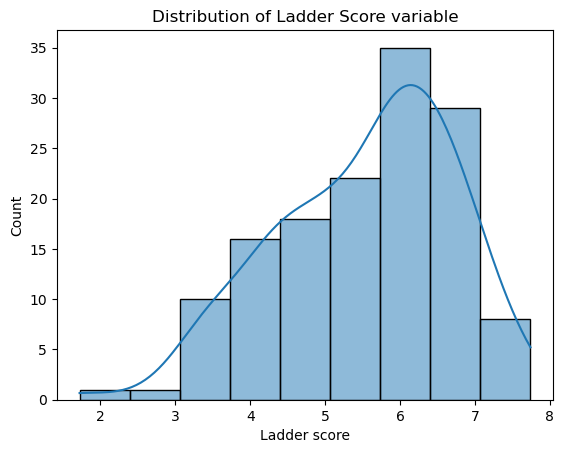

In [13]:
# Univariate: Histograms of happiness scores and features
sns.histplot(world_df['Ladder score'], kde=True)
plt.title('Distribution of Ladder Score variable')
plt.show() 


The distributin of the ladder score shows that many countries fall between the range 5 to 7. This means that many countries have have above average level of happiness. 

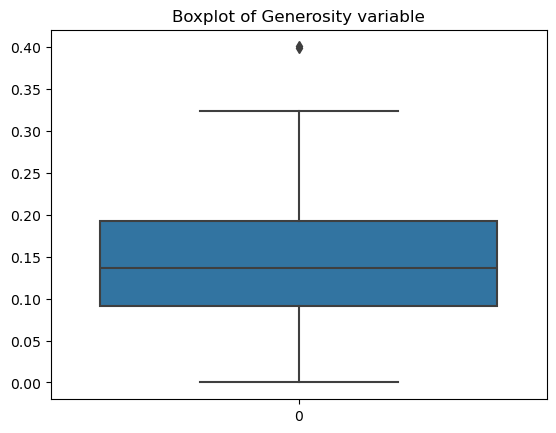

In [14]:
#boxplot for the generosity variable
sns.boxplot(world_df['Generosity'])
plt.title('Boxplot of Generosity variable')
plt.show()

The values in the variable are generally normally distributed as the median is in the middle of the box. The boxplot also shows that the generosity variable has an outlier. 

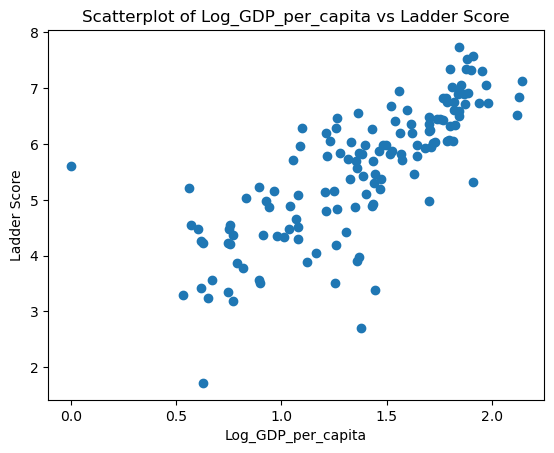

In [15]:
# Bivariate: Correlation matrix and scatter plots. 
plt.scatter(x=world_df['Log_GDP_per_capita'],y=world_df['Ladder score'])
plt.xlabel('Log_GDP_per_capita')
plt.ylabel('Ladder Score')
plt.title('Scatterplot of Log_GDP_per_capita vs Ladder Score')
plt.show()

The scatterplot of the Ladder Score and log_GDP_per_capita shows that there is a positive linear relationship between the variables

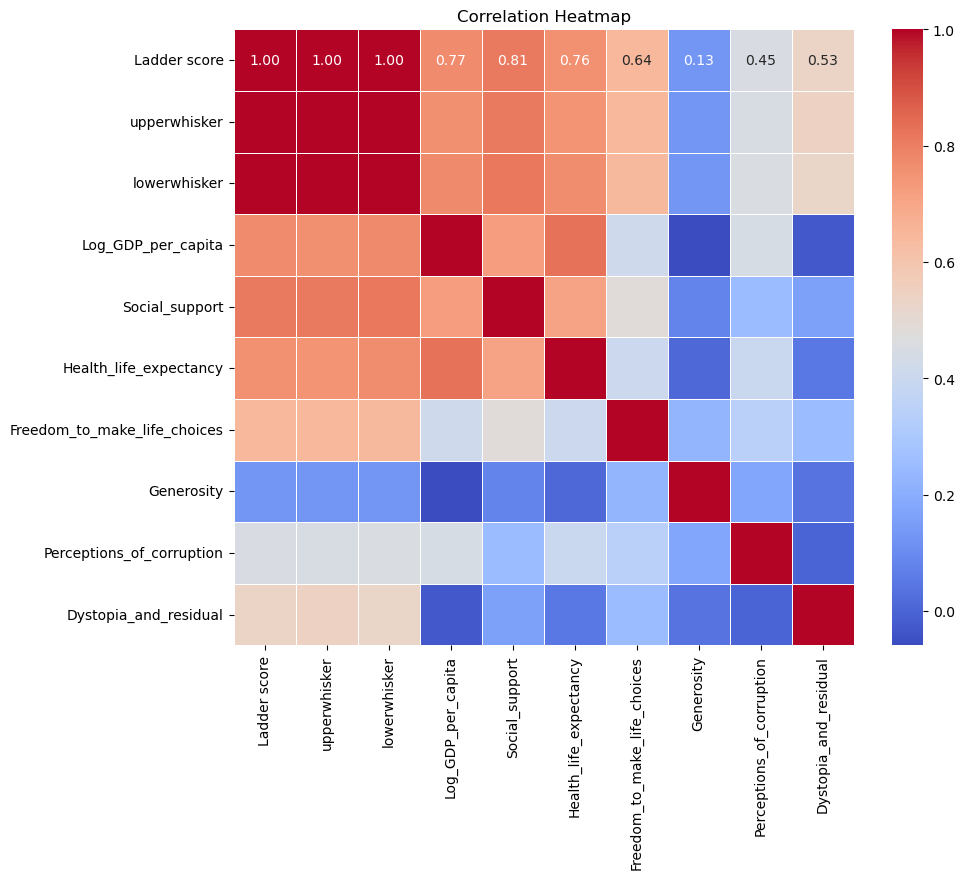

In [16]:
#correlation plots between the numerical variables 
plt.figure(figsize=(10, 8))
num_df = world_df.select_dtypes(include='number')
corr = num_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm',fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


c:\Users\PC\anaconda3-2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC\anaconda3-2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC\anaconda3-2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC\anaconda3-2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

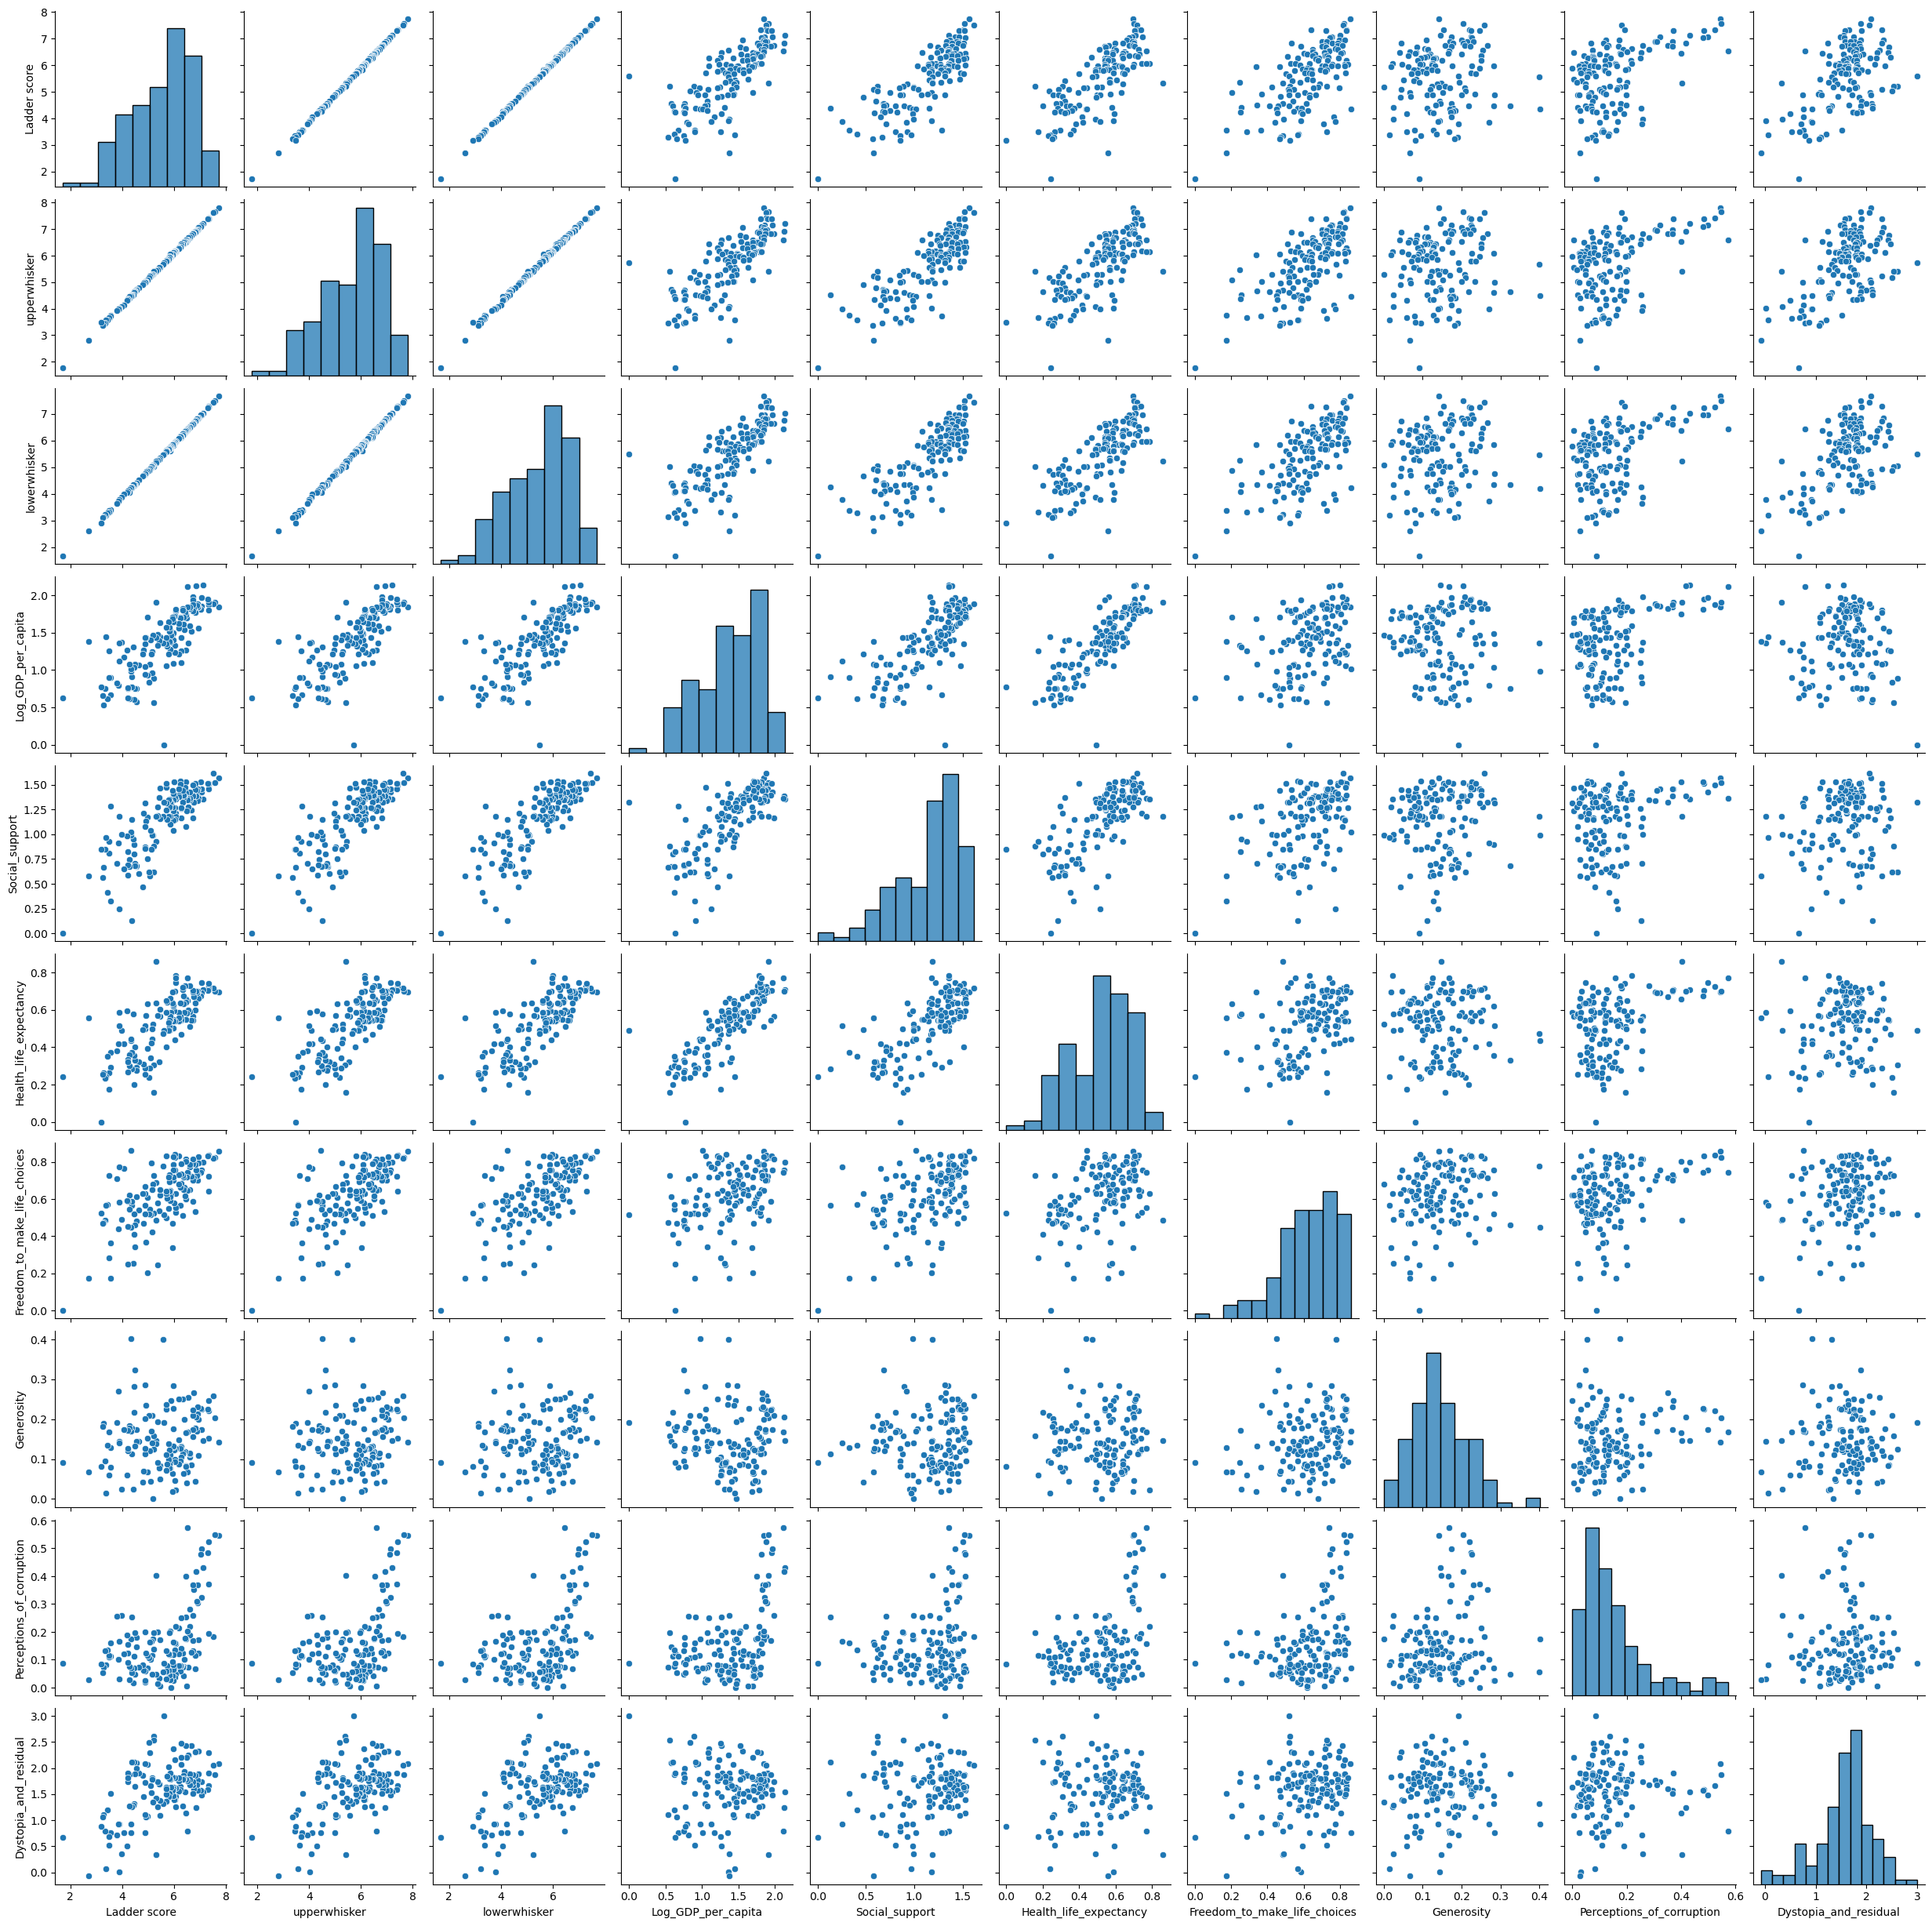

In [17]:
sns.pairplot(world_df)
plt.show();

The correlation heatmap and the pairplot show the same thing. We can see that most of the variables have a linear relationship. 

### Data Visualization

In [18]:
import pandas as pd
import plotly.express as px
plt.figure(figsize=(10, 10))
fig = px.choropleth(world_df,
                    locations="Country name",
                    locationmode='country names',
                    color="Ladder score",
                    hover_name="Country name",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Global Happiness Scores")

fig.show();


<Figure size 1000x1000 with 0 Axes>

The plot above shows interesting findings about the happiness globally. Countries in Europe, in particular scandanivian countries seem to be more happier followed by Western European countries, North American, Australia and New Zealand. The countries that follow closely are South American countries, Russia and East Asian countries. Countries in Africa, Middle East, and India seem to the least happy countries.

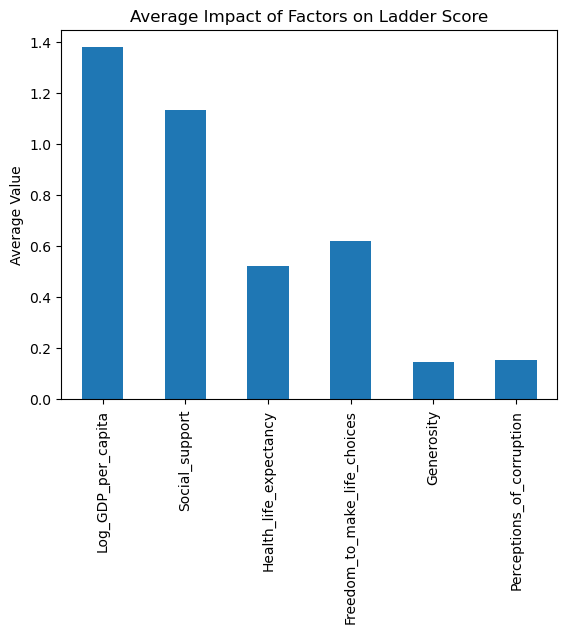

In [19]:
# Calculate the mean values of factors
factor_means = world_df[['Log_GDP_per_capita', 'Social_support', 'Health_life_expectancy',
                     'Freedom_to_make_life_choices', 'Generosity', 
                     'Perceptions_of_corruption']].mean()

# Plot the bar chart
factor_means.plot(kind='bar')
plt.title('Average Impact of Factors on Ladder Score')
plt.ylabel('Average Value')
plt.show()


The bar plot above shows us the factors that have big impact on happiness. We can see that GDP_per_capita, social support, freedom_to_make_Life_choices and health_life_expectancy have big influence on happiness. 